In [1]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [3]:
# Importação das bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Configuração do estilo dos gráficos
sns.set(style="whitegrid")

print("--- Parte 1: Carregando e preparando os dados ---")

try:
    # 1. Carregamento e Preparação Completa dos Dados
    df = pd.read_csv('imdb.csv')
    df.rename(columns={
        'Name': 'Title',
        'Rate': 'Rating',
        'Duration': 'Runtime'
    }, inplace=True)

    # Limpeza robusta das colunas
    df['Runtime'] = df['Runtime'].astype(str).str.replace(' min', '')
    df['Runtime'] = pd.to_numeric(df['Runtime'], errors='coerce')
    df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
    df['Votes'] = df['Votes'].str.replace(',', '', regex=False)
    df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')
    df['Genre'] = df['Genre'].astype(str).apply(lambda x: x.split(',')[0])
    
    # Remover linhas com dados ausentes nas colunas essenciais
    df.dropna(subset=['Runtime', 'Rating', 'Genre', 'Votes', 'Certificate'], inplace=True)
    df['Runtime'] = df['Runtime'].astype(int)
    df['Votes'] = df['Votes'].astype(int)
    
    print("✅ Dataset carregado e preparado com sucesso!")

except FileNotFoundError:
    print("❌ Erro: Arquivo 'imdb.csv' não encontrado. Verifique se o arquivo está na mesma pasta.")
except Exception as e:
    print(f"❌ Ocorreu um erro inesperado: {e}")

--- Parte 1: Carregando e preparando os dados ---
✅ Dataset carregado e preparado com sucesso!



--- Parte 2: Gerando Gráfico 1 (Boxplot) ---


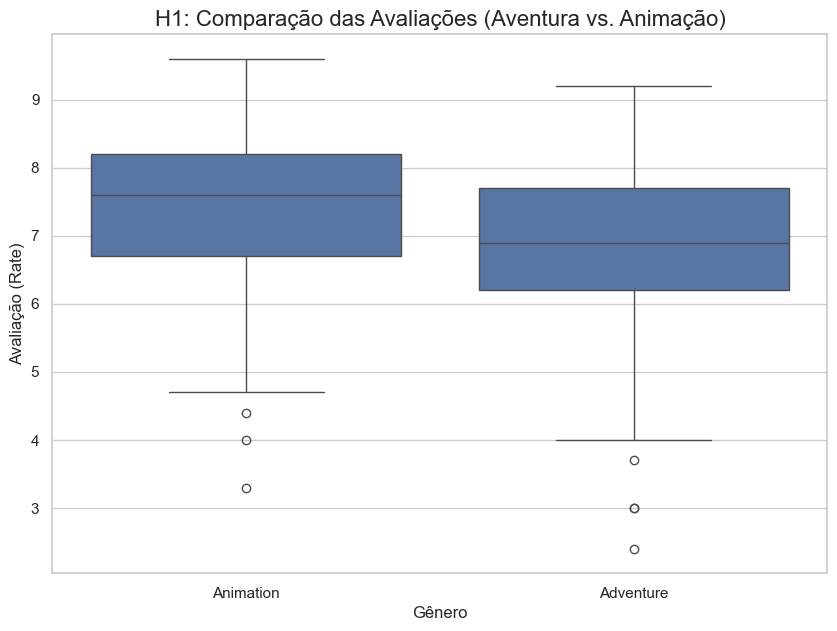

✅ Gráfico 'grafico_hipotese1_boxplot.png' salvo com sucesso.


In [4]:
print("\n--- Parte 2: Gerando Gráfico 1 (Boxplot) ---")

try:
    # GERAÇÃO DO GRÁFICO 1: HIPÓTESE 1 (BOXPLOT)
    plt.figure(figsize=(10, 7))
    sns.boxplot(x='Genre', y='Rating', data=df[df['Genre'].isin(['Adventure', 'Animation'])])
    plt.title('H1: Comparação das Avaliações (Aventura vs. Animação)', fontsize=16)
    plt.xlabel('Gênero', fontsize=12)
    plt.ylabel('Avaliação (Rate)', fontsize=12)
    plt.savefig('grafico_hipotese1_boxplot.png')
    plt.show() 
    print("✅ Gráfico 'grafico_hipotese1_boxplot.png' salvo com sucesso.")

except NameError:
    print("❌ Erro: O DataFrame 'df' não foi definido. Por favor, execute a Parte 1 primeiro.")
except Exception as e:
    print(f"❌ Ocorreu um erro inesperado: {e}")


--- Parte 3: Gerando Gráfico 2 (Gráfico de Barras) ---


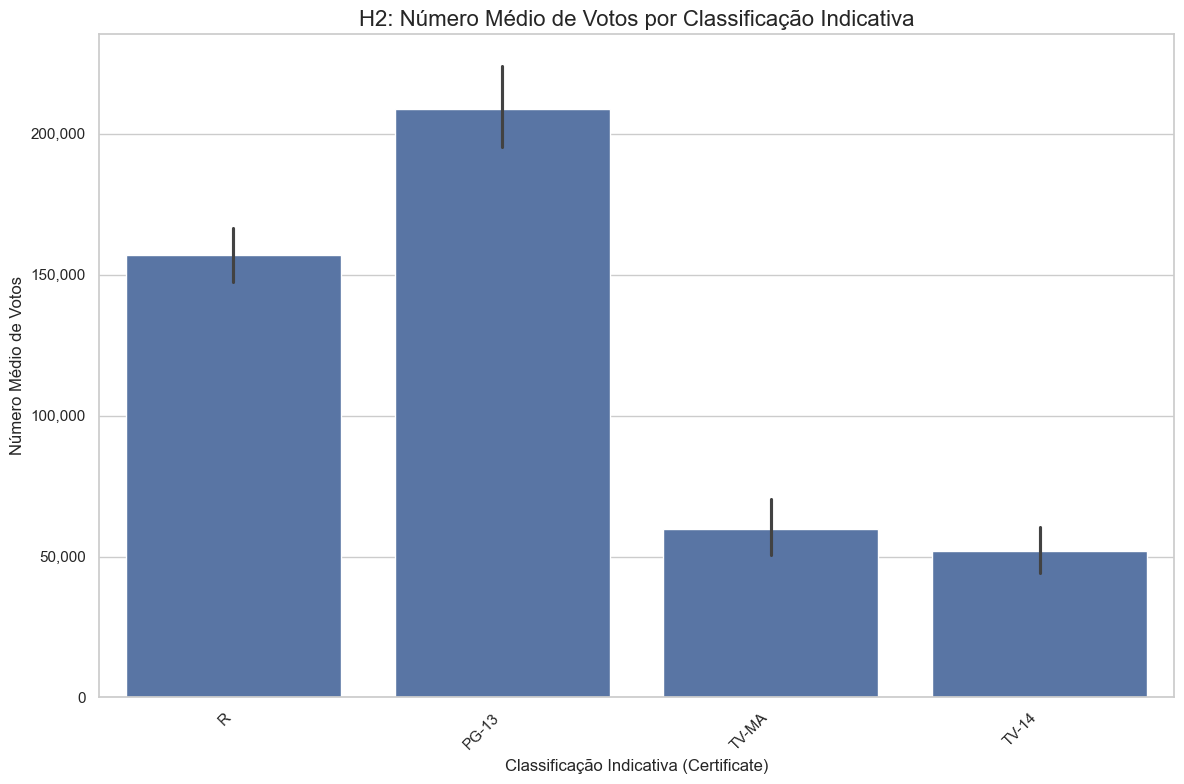

✅ Gráfico 'grafico_hipotese2_barras.png' salvo com sucesso.


In [5]:
print("\n--- Parte 3: Gerando Gráfico 2 (Gráfico de Barras) ---")

try:
    # GERAÇÃO DO GRÁFICO 2: HIPÓTESE 2 (GRÁFICO DE BARRAS)
    # Encontrar as 4 classificações mais comuns
    top_certificates = df['Certificate'].value_counts().nlargest(4).index.tolist()
    df_top_cert = df[df['Certificate'].isin(top_certificates)]

    plt.figure(figsize=(12, 8))
    sns.barplot(x='Certificate', y='Votes', data=df_top_cert, order=top_certificates)
    plt.title('H2: Número Médio de Votos por Classificação Indicativa', fontsize=16)
    plt.xlabel('Classificação Indicativa (Certificate)', fontsize=12)
    plt.ylabel('Número Médio de Votos', fontsize=12)
    plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig('grafico_hipotese2_barras.png')
    plt.show() 
    print("✅ Gráfico 'grafico_hipotese2_barras.png' salvo com sucesso.")

except NameError:
    print("❌ Erro: O DataFrame 'df' não foi definido. Por favor, execute a Parte 1 primeiro.")
except Exception as e:
    print(f"❌ Ocorreu um erro inesperado: {e}")